# Step-by-Step Code Examples

This notebook will take you step by step through the *Python* commands that are used in the `BiochemToolbox.py` library. If you choose to explore this optional resource then you will be better able to interpret what I have done in the library. 

You can use the *Enzyme Kinetics Four Ways for Report* notebook to make your plots simply by setting up the correct x and y variables (e.g. for Lineweaver-Burke just set x = 1/S and y = 1/rate). You could also use this document to do that as well. However, I recommend just stealing the code in the *Enzyme Kinetics Four Ways for Report* notebook and making your exercise a simple as possible. 

## Setup

First we must import any tools that are needed. We will be using the *NumPy* library for math operations and to provide the array data structure for storing our numbers. The *MatPlotLib* library will provide tools for plotting. The *SciPy* library provides tools for data analysis. The *SciKit-Learn* library provides more data analysis tools (mostly for machine learning - we will use a tool that calculates the $r^2$ score for a curve fit). The *Uncertainties* library allows us to use numbers that include uncertainty and to automatically take care of error propagation.  The Uncertainties package is noit included in Colab and so we must install it.

In [27]:
from scipy.optimize import curve_fit
import numpy as np                       
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

### uncomment line below in Colab.
!pip install uncertainties  ### to install 'Uncertainties' package in Colab. 
!pip3 install scikit-learn

import uncertainties as un
from uncertainties import unumpy as unp



## Data

Now we must enter the data. there are many ways to do this. Here I will just make two lists; one for x and one for y. I must convert these lists to *NumPy* arrays to do math with them. Multiplying a list by 5 will just get me five lists. Multiplying an array by 5 will apply that operation to each number in the array.

In [28]:
conc = [0.05, 0.10, 0.25, 0.50, 1.00, 2.50, 5.00, 8.00, 20.0, 30.0]
rate = [0.008, 0.010, 0.021, 0.042, 0.067, 0.105, 0.160, 0.171, 0.232, 0.241]

#conc = [1.0, 3.0, 5, 8, 10, 20]
#rate = [0.028, 0.057, 0.085, 0.101, 0.112, 0.141]

conc = np.array(conc)     # convert lists to arrays
rate = np.array(rate)

e420 = 5.5 # AU/mM/cm
E_conc = 10 # micromolar
rate = rate/(e420*1000)*1E6

## A Quick Plot

We can now quickly visualize the data using the *PyPlot* sublibrary of *MatPlotLib*. We named it as `plt` as is standard practice in the *Python* world.

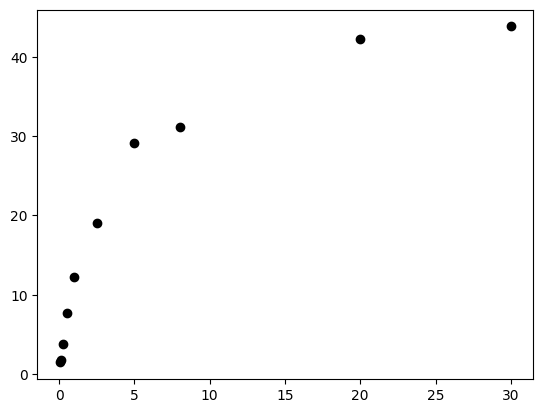

In [29]:
x = conc
y = rate      # I like to always use x and y in plot commands. Then I never need to change the plot command.

plt.plot(x, y, "ko")    # plot using black ("k") circles ("o")

## Curve Fitting

Whether is is a straight line function or the Michaelis-Menten function we can obtain parameters that give a best fit using the curve_fit function in the *SciPy* library. The function will return an array of the parameters and an array of statistical information. We will use the *Uncertainties* package to convert that to a set of floating point numbers that include information about their uncertainty (standard errors and correlation information.)

In the code below you will see a function defined. Here we will use the Michaelis-Menten function but you can use any function. So this code could be stolen and repurposed to fit a linear function. The final result is an array of uncertain numbers that represent the best fit parameters.

The **Michaelis-Menten** equation that we are using as the fit function is... $$\nu = V_{max}\frac{[S]}{K_M + [S]}$$

In [30]:
def MMfunction(S, Vmax, KM):  # This function takes a value of concentration and calculates rate
    v = Vmax * S / (KM + S)
    return(v)

param, pcov = curve_fit(MMfunction, x, y)   # Perform the curve fit and get parameters and covariance

y_calc = MMfunction(x, *param)              # calculate predicted rates based on best fit parameters
rsq = r2_score(y, y_calc)                   # calculate r^2 score for experimental vs calculated rates

uparam = un.correlated_values(param, pcov)  # Convert results to ufloat (uncertain floats)
Vmax, KM = uparam                           # get the reults from the uparam list

### Print the results
print("CURVE FIT REPORT")
print(f"Vmax = {Vmax:0.4f}")
print(f"KM = {KM:0.4f}")
print(f"rsq = {rsq:0.4f}")


CURVE FIT REPORT
Vmax = 48.3862+/-1.4904
KM = 3.4994+/-0.3593
rsq = 0.9937


## Plot The Curve Fit

We can plot the curve fit along with the data. First we will create a list of values from zero to the maximum concentration. We will use this as a list of concentrations to calculate a list of predicetd rates according to the best fit results. We will plot this calculated line and the data on the same plot.

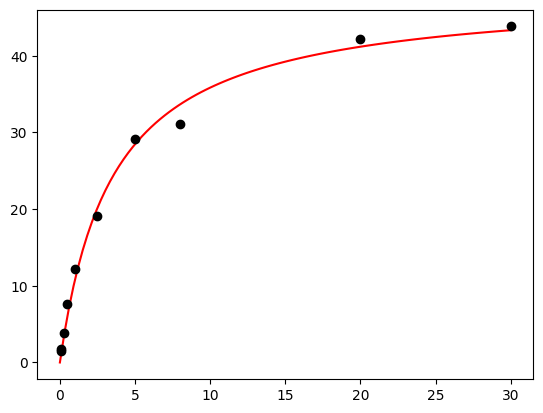

In [31]:
max_x = np.max(x)
x_forline = np.linspace(0,max_x,100)
y_predicted = MMfunction(x_forline, *param) 

plt.plot(x_forline, y_predicted, "r-")   # plot using red ("r") line ("-")
plt.plot(x, y, "ko")                     # plot using black ("k") circles ("o")

plt.show()

## Linear Plots

In MS Excel we favour linear plots because it was designed for business where everything is a straight line going up or you will be fired. However, functions that describe the natural are seldome linear. Sometimes, through algebraic manipulation, one can convert a function to a linear form. Such is the case with the Lineweaver-Burke version of the Michailis-Menten equation.

We will set $x = \frac{1}{conc}$ and $y = \frac{1}{rate}$ and then fit the data to a linear function to obtain the best fit parameters for slope and intercept. There are many, many tools in *Python* that will fit a staight line. We will steal the code above and change it to serve our purposes.

In [32]:
x = 1/conc    # data for Lineweaver-Burke plot
y = 1/rate

## Steal a Curve Fit

Observe the code below. It is the same code used above. I changed the function to one that describes a linear function. I then had to calculate $V_{max}$ and $K_M$ from the slope and intercept. Other than that it is the same code. Never re-invent a wheel. Steal and give credit.

Remember, stealing is not copying. If you copy something you will not learn anything. If you steal something you will be repurposing it to accomplish a goal. Steal the tools, do not copy the ideas. 

The **Lineweaver-Burke** equation that we are using as the fit function is... $$\frac{1}{\nu} = \frac{K_M}{V_{max}}\frac{1}{[S]}+\frac{1}{V_{max}}$$

LINEAR FIT REPORT
Vmax = 19.1926+/-8.8928
KM = 0.6888+/-0.3570
rsq = 0.9351


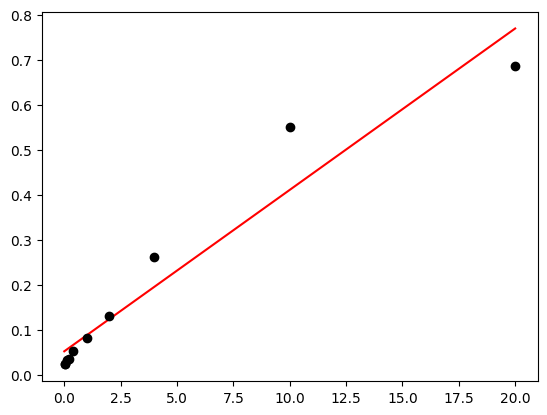

In [33]:
### Copy curve fit code and change function
 
def function(x, slope, intercept):  # This function takes a value of x and calculates y
    y = slope * x + intercept
    return(y)

param, pcov = curve_fit(function, x, y)       # Perform the curve fit and get parameters and covariance

y_calc = function(x, *param)                  # calculate predicted rates based on best fit parameters
rsq = r2_score(y, y_calc)                   # calculate r^2 score for experimental vs calculated rates

uparam = un.correlated_values(param, pcov)  # Convert results to ufloat (uncertain floats)
slope, intercept = uparam                   # get the reults from the uparam list

Vmax = 1 / intercept
KM = Vmax * slope

### Print the results
print("LINEAR FIT REPORT")
print(f"Vmax = {Vmax:0.4f}")
print(f"KM = {KM:0.4f}")
print(f"rsq = {rsq:0.4f}")

max_x = np.max(x)
x_forline = np.linspace(0,max_x,100)
y_predicted = function(x_forline, *param) 

plt.plot(x_forline, y_predicted, "r-")   # plot using red ("r") line ("-")
plt.plot(x, y, "ko")                     # plot using black ("k") circles ("o")

plt.show()

## Eadie-Hofstee

I will steal all the code above again but modify it so that the slope and intercept give me the parameters for the Eadie-Hofstee version of the Michaelis-Menten equation.

The **Eadie-Hofstee** equation that we are using as the fit function is... $$\nu = K_M \frac{\nu}{[S]} + V_{max}$$

LINEAR FIT REPORT
Vmax = 38.0007+/-4.0832
KM = -1.6935+/-0.2958
rsq = 0.8038


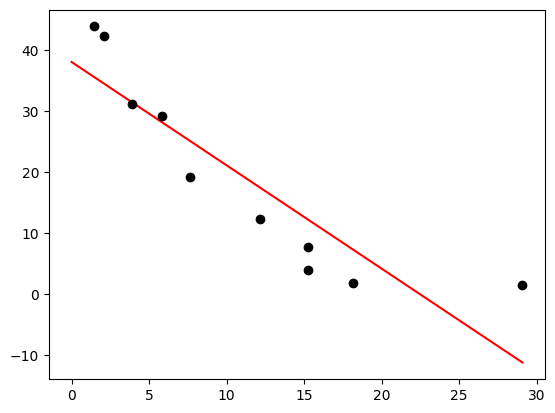

In [34]:
x = rate/conc    # data for eadie-Hofstee plot
y = rate

### Copy curve fit code and change function
 
def function(x, slope, intercept):  # This function takes a value of x and calculates y
    y = slope * x + intercept
    return(y)

param, pcov = curve_fit(function, x, y)       # Perform the curve fit and get parameters and covariance

y_calc = function(x, *param)                  # calculate predicted rates based on best fit parameters
rsq = r2_score(y, y_calc)                   # calculate r^2 score for experimental vs calculated rates

uparam = un.correlated_values(param, pcov)  # Convert results to ufloat (uncertain floats)
slope, intercept = uparam                   # get the reults from the uparam list

Vmax = intercept
KM = slope

### Print the results
print("LINEAR FIT REPORT")
print(f"Vmax = {Vmax:0.4f}")
print(f"KM = {KM:0.4f}")
print(f"rsq = {rsq:0.4f}")

max_x = np.max(x)
x_forline = np.linspace(0,max_x,100)
y_predicted = function(x_forline, *param) 

plt.plot(x_forline, y_predicted, "r-")   # plot using red ("r") line ("-")
plt.plot(x, y, "ko")                     # plot using black ("k") circles ("o")

plt.show()

## Hanes-Wolfe

I will steal all the code above again but modify it so that the slope and intercept give me the parameters for the Hanes-Wolfe version of the Michaelis-Menten equation.

The **Hanes-Wolfe** equation that we are using as the fit function is... $$\frac{[S]}{\nu} = \frac{1}{V_{max}}[S] + \frac{K_M}{V_{max}}$$

LINEAR FIT REPORT
Vmax = 47.6342+/-1.1961
KM = 2.8885+/-0.3433
rsq = 0.9950


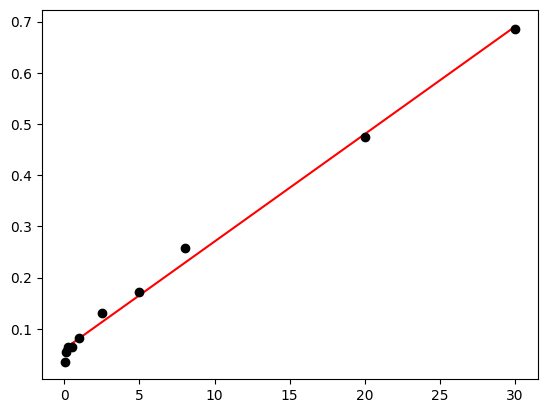

In [35]:
x = conc    # data for eadie-Hofstee plot
y = conc/rate

### Copy curve fit code and change function
 
def function(x, slope, intercept):  # This function takes a value of x and calculates y
    y = slope * x + intercept
    return(y)

param, pcov = curve_fit(function, x, y)       # Perform the curve fit and get parameters and covariance

y_calc = function(x, *param)                  # calculate predicted rates based on best fit parameters
rsq = r2_score(y, y_calc)                   # calculate r^2 score for experimental vs calculated rates

uparam = un.correlated_values(param, pcov)  # Convert results to ufloat (uncertain floats)
slope, intercept = uparam                   # get the reults from the uparam list

Vmax = 1/slope
KM = Vmax * intercept

### Print the results
print("LINEAR FIT REPORT")
print(f"Vmax = {Vmax:0.4f}")
print(f"KM = {KM:0.4f}")
print(f"rsq = {rsq:0.4f}")

max_x = np.max(x)
x_forline = np.linspace(0,max_x,100)
y_predicted = function(x_forline, *param) 

plt.plot(x_forline, y_predicted, "r-")   # plot using red ("r") line ("-")
plt.plot(x, y, "ko")                     # plot using black ("k") circles ("o")

plt.show()

## Steal It All and Compare

Let us now repeat all the analyses above to determine $V_{max}$ and $K_M$. We will then plot the data in a Micahelis-Menten plot and then plot the lines prediceted using $V_{max}$ and $K_M$ from each method. 

I will simply copy the code above and paste it into the blcok below. thats all, cut and paste. Always try to write code so that it is easily re-used. The best code to steal is your own code.

MICHAELIS-MENTEN CURVE FIT REPORT - Red
Vmax = 48.3862+/-1.4904
KM = 3.4994+/-0.3593
rsq = 0.9937

LB LINEAR FIT REPORT - Blue
Vmax = 19.1926+/-8.8928
KM = 0.6888+/-0.3570
rsq = 0.9351

EH LINEAR FIT REPORT - Green
Vmax = 38.0007+/-4.0832
KM = 1.6935+/-0.2958
rsq = 0.8038

HW LINEAR FIT REPORT - Cyan
Vmax = 47.6342+/-1.1961
KM = 2.8885+/-0.3433
rsq = 0.9950


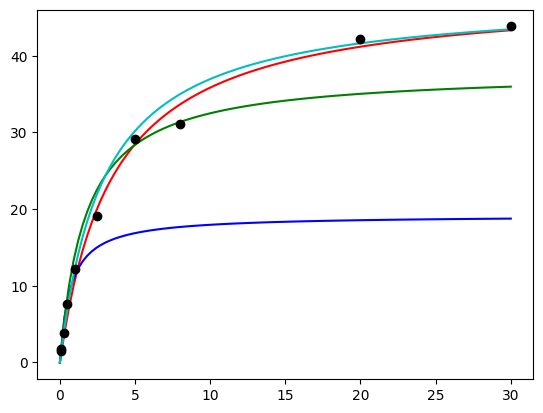

In [36]:
x = conc
y = rate      # I like to always use x and y in plot commands. Then I never need to change the plot command.

def MMfunction(S, Vmax, KM):  # This function takes a value of concentration and calculates rate
    v = Vmax * S / (KM + S)
    return(v)

param, pcov = curve_fit(MMfunction, x, y)   # Perform the curve fit and get parameters and covariance

y_calc = MMfunction(x, *param)              # calculate predicted rates based on best fit parameters
rsq = r2_score(y, y_calc)                   # calculate r^2 score for experimental vs calculated rates

uparam = un.correlated_values(param, pcov)  # Convert results to ufloat (uncertain floats)
Vmax, KM = uparam                           # get the reults from the uparam list

### Print the results
print("MICHAELIS-MENTEN CURVE FIT REPORT - Red")
print(f"Vmax = {Vmax:0.4f}")
print(f"KM = {KM:0.4f}")
print(f"rsq = {rsq:0.4f}")
print()

max_x = np.max(conc)
x_forline = np.linspace(0,max_x,100)
y_predicted = MMfunction(x_forline, Vmax.n, KM.n) 

plt.plot(x_forline, y_predicted, "r-")   # plot using red ("r") line ("-")

################################################################################

x = 1/conc    # data for Lineweaver-Burke plot
y = 1/rate

### Copy curve fit code and change function
 
def function(x, slope, intercept):  # This function takes a value of x and calculates y
    y = slope * x + intercept
    return(y)

param, pcov = curve_fit(function, x, y)       # Perform the curve fit and get parameters and covariance

y_calc = function(x, *param)                  # calculate predicted rates based on best fit parameters
rsq = r2_score(y, y_calc)                   # calculate r^2 score for experimental vs calculated rates

uparam = un.correlated_values(param, pcov)  # Convert results to ufloat (uncertain floats)
slope, intercept = uparam                   # get the reults from the uparam list

Vmax = 1 / intercept
KM = Vmax * slope

### Print the results
print("LB LINEAR FIT REPORT - Blue")
print(f"Vmax = {Vmax:0.4f}")
print(f"KM = {KM:0.4f}")
print(f"rsq = {rsq:0.4f}")
print()

max_x = np.max(conc)
x_forline = np.linspace(0,max_x,100)
y_predicted = MMfunction(x_forline, Vmax.n, KM.n) 

plt.plot(x_forline, y_predicted, "b-")   # plot using blue ("b") line ("-")

################################################################################

x = rate/conc    # data for eadie-Hofstee plot
y = rate

### Copy curve fit code and change function
 
param, pcov = curve_fit(function, x, y)       # Perform the curve fit and get parameters and covariance

y_calc = function(x, *param)                  # calculate predicted rates based on best fit parameters
rsq = r2_score(y, y_calc)                   # calculate r^2 score for experimental vs calculated rates

uparam = un.correlated_values(param, pcov)  # Convert results to ufloat (uncertain floats)
slope, intercept = uparam                   # get the reults from the uparam list

Vmax = intercept
KM = -slope

### Print the results
print("EH LINEAR FIT REPORT - Green")
print(f"Vmax = {Vmax:0.4f}")
print(f"KM = {KM:0.4f}")
print(f"rsq = {rsq:0.4f}")
print()

max_x = np.max(conc)
x_forline = np.linspace(0,max_x,100)
y_predicted = MMfunction(x_forline, Vmax.n, KM.n) 

plt.plot(x_forline, y_predicted, "g-")   # plot using red ("r") line ("-")


################################################################################

x = conc    # data for eadie-Hofstee plot
y = conc/rate

### Copy curve fit code and change function
 
def function(x, slope, intercept):  # This function takes a value of x and calculates y
    y = slope * x + intercept
    return(y)

param, pcov = curve_fit(function, x, y)       # Perform the curve fit and get parameters and covariance

y_calc = function(x, *param)                  # calculate predicted rates based on best fit parameters
rsq = r2_score(y, y_calc)                   # calculate r^2 score for experimental vs calculated rates

uparam = un.correlated_values(param, pcov)  # Convert results to ufloat (uncertain floats)
slope, intercept = uparam                   # get the reults from the uparam list

Vmax = 1/slope
KM = Vmax * intercept

### Print the results
print("HW LINEAR FIT REPORT - Cyan")
print(f"Vmax = {Vmax:0.4f}")
print(f"KM = {KM:0.4f}")
print(f"rsq = {rsq:0.4f}")

max_x = np.max(conc)
x_forline = np.linspace(0,max_x,100)
y_predicted = MMfunction(x_forline, Vmax.n, KM.n) 

plt.plot(x_forline, y_predicted, "c-")   # plot using cyan ("c") line ("-")

################################################################################

plt.plot(conc, rate, "ko")                     # plot using black ("k") circles ("o")

plt.show()